In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
import matplotlib.image as mpimg
%matplotlib widget


In [223]:
def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [224]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.726 #K

In [225]:
G = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2 * (2*K**3*T**3)/(vc**2*h_pl**2) #intensity not occupation number
Y = lambda x: G(x) * ( x* (np.exp(x)+1)/(np.exp(x)-1)-4 ) 
M = lambda x: G(x)* (0.4561-1.0/x) 

In [226]:
I0 =(2*K**3*T**3)/(vc**2*h_pl**2)*1e26

In [227]:
folder = 'outputs/check-cosmotherm-mu/5e5-heating/PDE-non-linear/Greens/'

file_path = os.path.join(folder, "Dn_0.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
#nu_5e5h = HC.iloc[:, 1].values    #frequency in Ghz
x = HC.iloc[:, 0].values    #frequency in Ghz
DI = (HC.iloc[:, 4].values)
DI_N = (HC.iloc[:, 5].values)

op = pd.read_csv(file_path, skiprows= lambda x: x not in [19], delimiter=' ', header=None)
Jbb_5e5h= op.iat[0,1]
mu = 1.401e-5 * Jbb_5e5h

In [228]:
#Analytic estimation of mu distortion taking into connsideration how much energy I have injected
x1 = []
y1 = []

folder2 = 'outputs'
file_path = os.path.join(folder2, "plot-data.csv")
op = pd.read_csv(file_path, skiprows=1, header=None)
x1 = op.iloc[:, 0].values
y1 = (op.iloc[:, 1].values*1e-5)


In [229]:
x1

array([1.00000000e-02, 1.28074505e-02, 1.89501189e-02, 3.17316414e-02,
       6.13846383e-02, 1.01733196e-01, 1.50526145e-01, 2.97258532e-01,
       4.13445158e-01, 3.54204220e-01, 4.82594191e-01, 5.63308453e-01,
       6.92306657e-01, 8.50845578e-01, 1.01384170e+00, 1.19567167e+00,
       1.38133338e+00, 1.48471054e+00, 1.61236249e+00, 1.80599448e+00,
       1.92124208e+00, 2.21956903e+00, 2.51188643e+00, 2.84270205e+00,
       3.11910396e+00, 3.49368369e+00, 3.79406247e+00, 4.12026713e+00,
       4.29374077e+00, 4.66290660e+00, 5.16931308e+00, 5.44278144e+00,
       5.73071691e+00, 5.97199455e+00, 6.28792659e+00, 6.89931494e+00,
       7.33958732e+00, 7.97062794e+00, 8.56713915e+00, 9.30372182e+00,
       1.05290226e+01, 1.32097781e+01, 2.01594005e+01, 2.95222364e+01,
       3.98107171e+01, 4.89274114e+01])

In [230]:
img = mpimg.imread('outputs/paperI.png')

In [231]:
DI_N = DI_N[x>1e-2] 
DI = DI[x>1e-2] 
x = x[x>1e-2]




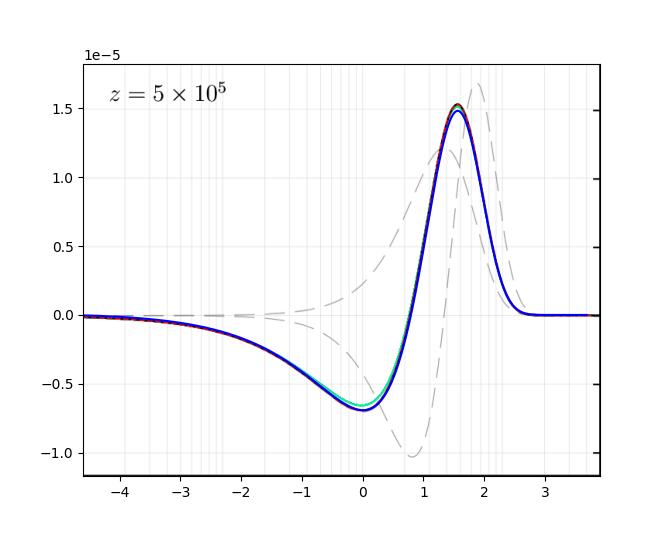

In [232]:
ymax= 1.82e-5
ymin = -1.17e-5
fig, ax = plt.subplots(figsize=(img.shape[1] / 100, img.shape[0] / 100))
ax.imshow(img, extent=[np.log(x).min(), np.log(50), ymin,ymax], aspect='auto')

#ax.plot(np.log(x),DI, label = "DI", color= "pink")
ax.plot(np.log(x),DI_N/I0, label = "DI_N", color= "blue")
#ax.plot(np.log(x),M(x)*mu*1e26/I0*1.04, label = "mu distortion", color = "yellow", linestyle = "dashed",linewidth=2)

#ax.set_xscale('log')
ax.set_xlim([np.log(x).min(), np.log(50)])  # Limiti asse x (se necessario)
ax.set_ylim(ymin,ymax)
# Mostra la legenda
#ax.legend()

# Rimuovi gli assi per una sovrapposizione più pulita
#ax.axis('off')
#ax.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
#ax.grid(True, which = 'both',  linestyle='--', linewidth=1)


#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

plt.show()

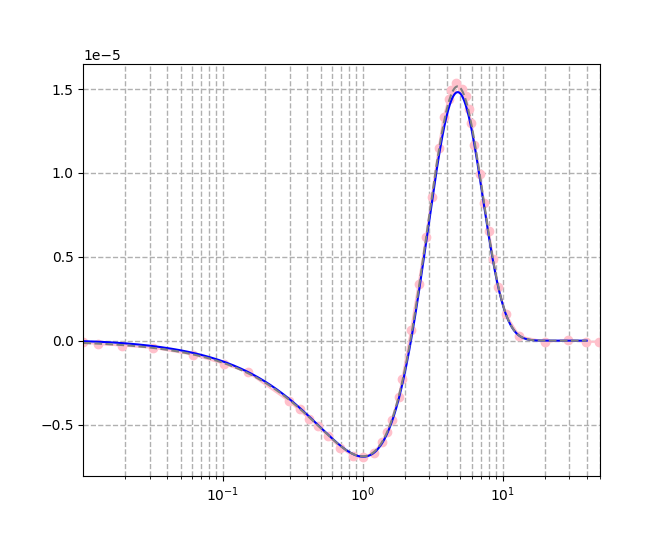

In [238]:
fig, ax = plt.subplots(figsize=(img.shape[1] / 100, img.shape[0] / 100))
#ax.imshow(img, extent=[np.log(x).min(), np.log(x).max(), -1.2e-5,1.75e-5], aspect='auto')

ax.plot(x1,y1, label = "DI", color= "pink",marker="o")
ax.plot(x,DI_N/I0, label = "DI_N", color= "blue")
#ax.plot(x,DI/I0, label = "DI_N", color= "green")

ax.plot(x,M(x)*mu*1e26/I0*1.03, label = "mu distortion", color = "gray", linestyle = "dashed")

ax.set_xscale('log')
ax.set_xlim([x.min(), 50])  # Limiti asse x (se necessario)
#ax.set_ylim(-1.2e-5,1.75e-5)
# Mostra la legenda
#ax.legend()

# Rimuovi gli assi per una sovrapposizione più pulita
#ax.axis('off')
#ax.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)


#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

plt.show()